## Stochastic and Mini Batch Gradient Descent Algorithm implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create dataset
from sklearn.datasets import make_regression
x,y=make_regression(n_features=1,n_samples=5000,bias=10,noise=15)
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape,y.shape)

(5000,) (5000,)


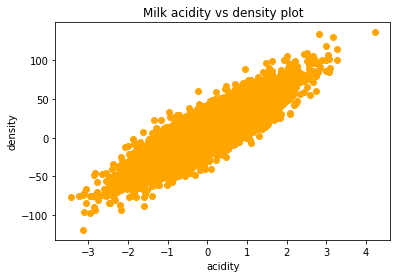

In [3]:
#standardise dataset and plot it
x=(x-x.mean())/x.std()
plt.scatter(x,y,color='orange')
plt.xlabel("acidity")
plt.ylabel("density")
plt.title("Milk acidity vs density plot")
plt.show()

In [4]:
#calculate predicted value
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

#calculate error between predicted and real value
def error(X,Y,theta):
    err=0
    m=Y.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(Y[i]-hx)**2
        
    return err

#Batch Gradient Implementation , if batch size=1 means Stochastic gradient algo
def batchGradient(X,Y,theta,batch_size=1):
    m=Y.shape[0]
    indices=np.arange(m)
    np.random.shuffle(indices)
    indices=indices[:batch_size]
    grad=np.zeros((2,))
    
    for i in indices:
        hx=hypothesis(X[i],theta)
        grad[0]+=(Y[i]-hx)
        grad[1]+=(Y[i]-hx)*X[i]
        
    return grad    


In [5]:
#gradient descent algo
def GradientDescent(X,Y,learning_rate=0.001,batch_size=1):
    theta=np.zeros((2,))
    e=error(X,Y,theta)
    error_list=[e]
    theta_list=[theta]
    itr=0
    while(itr<=400):
        grad=batchGradient(X,Y,theta,batch_size)
        theta[0]=theta[0]+learning_rate*grad[0]
        theta[1]=theta[1]+learning_rate*grad[1]
        theta_list.append(theta)
        ne=error(X,Y,theta)
        error_list.append(ne)
        
        itr+=1
    return theta,error_list,theta_list

In [6]:
#plot the theta variation
def plotTheta(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypothesis(x_pts,theta)

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')

[ 9.44862185 28.85865795]


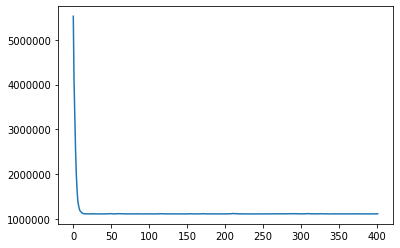

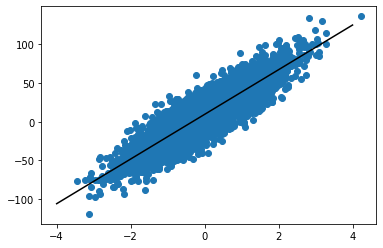

In [7]:
#calculate predictions with batch_size=200
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=200)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[ 9.87551469 27.76343653]


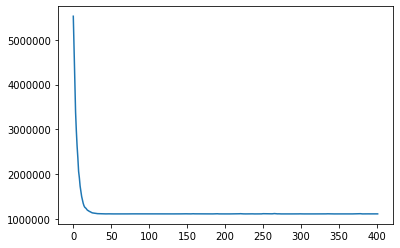

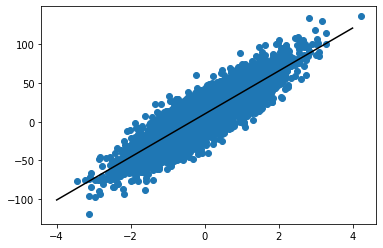

In [8]:
#calculate predictions with batch_size=100
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=100)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[ 9.54184924 28.09774581]


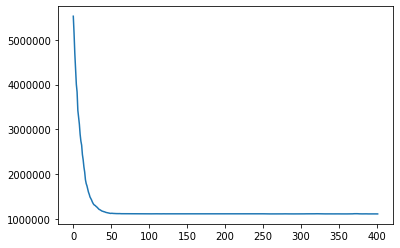

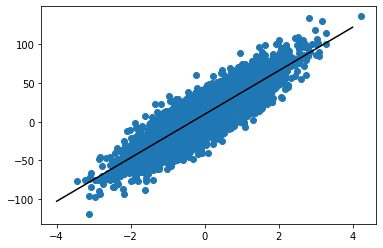

In [9]:
#calculate predictions with batch_size=50
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=50)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[ 9.55667641 27.50215305]


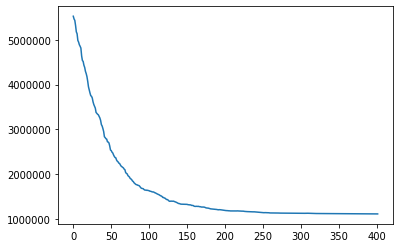

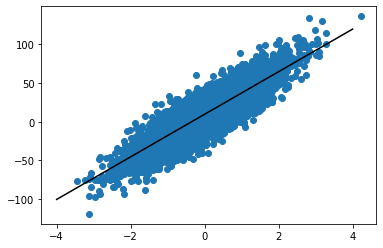

In [10]:
#calculate predictions with batch_size=10
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=10)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[ 8.42756427 24.92373594]


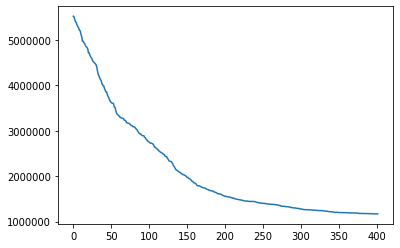

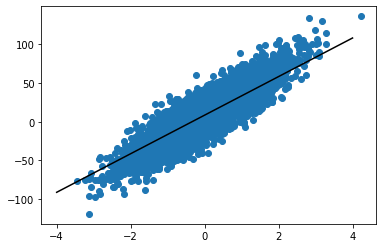

In [11]:
#calculate predictions with batch_size=5
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=5)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[ 5.08558609 16.58312745]


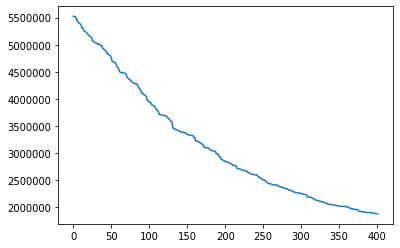

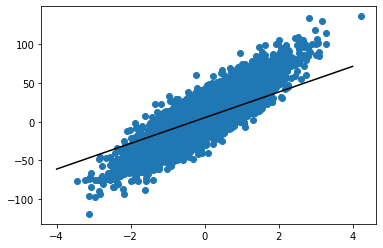

In [12]:
#calculate predictions with batch_size=2
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=2)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)

[2.9674883  9.29144498]


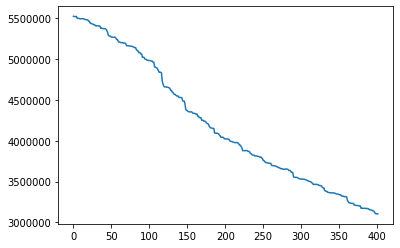

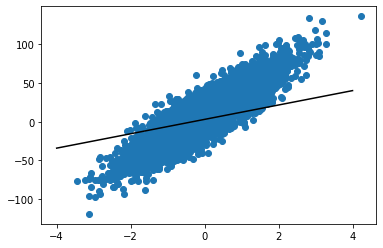

In [13]:
#calculate predictions with batch_size=1
final_theta,error_list,theta_list=GradientDescent(x,y,batch_size=1)
print(final_theta)
plt.plot(error_list)
plt.show()
plotTheta(final_theta)